<a href="https://colab.research.google.com/github/krishna663-wq/Machine_Learning/blob/main/research_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import matthews_corrcoef, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('creditcard_dataset.csv')

In [ ]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
print(data.shape)
print(data.describe())

(568630, 31)
                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

1.0
Fraud Cases: 284315
Valid Transactions: 284315


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,284315.000000
mean,12057.601763
std,6909.750891
min,50.010000
25%,6074.640000
50%,12062.450000
75%,18033.780000
max,24039.930000


In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,284315.000000
mean,12026.313506
std,6929.500715
min,50.120000
25%,6034.540000
50%,11996.900000
75%,18040.265000
max,24039.930000


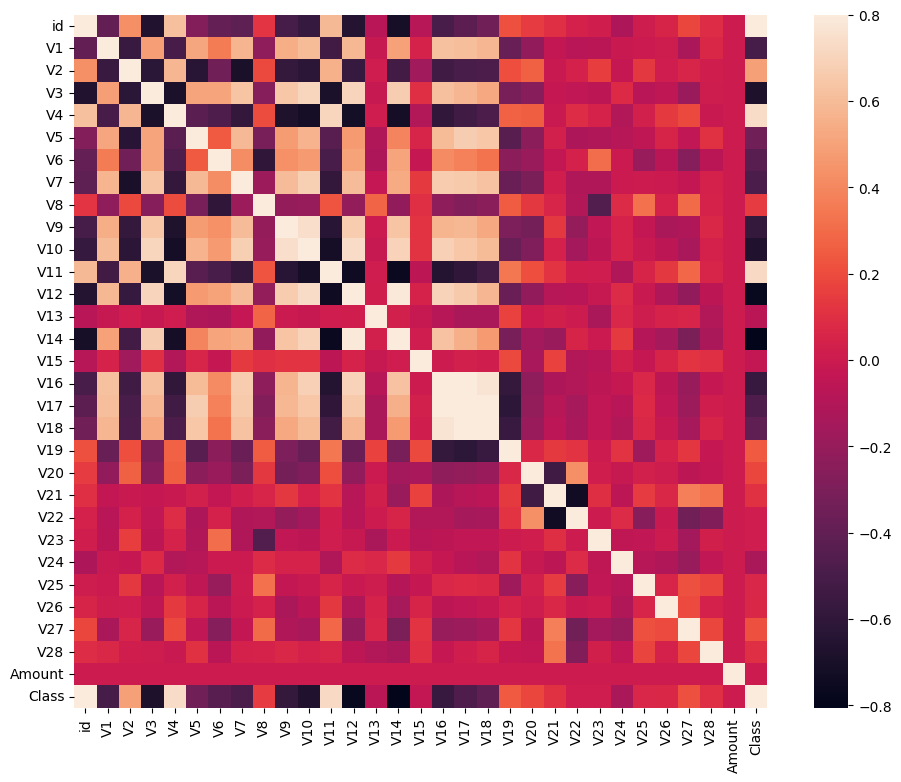

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(568630, 30)
(568630,)


In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [ ]:
def evaluate_model(model):
    model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    mcc = matthews_corrcoef(yTest, yPred)
    print(f"{model.__class__.__name__} MCC: {mcc}")
    print(classification_report(yTest, yPred))
    return mcc

In [ ]:
# Naive Bayes
nb = GaussianNB()
evaluate_model(nb)

GaussianNB MCC: 0.9890686106555515
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56750
           1       1.00      0.99      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



0.9890686106555515

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
evaluate_model(dt)

DecisionTreeClassifier MCC: 0.9991206997666566
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



0.9991206997666566

In [ ]:
# Random Forest
rf = RandomForestClassifier()
evaluate_model(rf)

RandomForestClassifier MCC: 0.999665874873792
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



0.999665874873792

In [ ]:
# Gradient Boosted Tree
gb = GradientBoostingClassifier()
evaluate_model(gb)

GradientBoostingClassifier MCC: 0.9994196556569427
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



0.9994196556569427

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr)

LogisticRegression MCC: 0.9954280131820922
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9954280131820922

In [ ]:
# Support Vector Machine
svm = SVC()
evaluate_model(svm)

SVC MCC: 0.9983480442032843
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



0.9983480442032843

In [ ]:
# Multi-Layer Perceptron
mlp = MLPClassifier(max_iter=20)
evaluate_model(mlp)

MLPClassifier MCC: 0.9891916405581697
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56750
           1       1.00      0.99      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



0.9891916405581697

In [ ]:
# Linear Regression (Converted for Classification)
lr_model = LinearRegression()
lr_model.fit(xTrain, yTrain)
yPred_lr = (lr_model.predict(xTest) > 0.5).astype(int)
mcc_lr = matthews_corrcoef(yTest, yPred_lr)
print(f"Linear Regression MCC: {mcc_lr}")
print(classification_report(yTest, yPred_lr))

Linear Regression MCC: 0.9785836152690759
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56750
           1       1.00      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [ ]:
# Deep Learning Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Defining the deep learning model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(xTrain.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(xTrain, yTrain, epochs=10, batch_size=32, verbose=1)
yPred_dl = (dl_model.predict(xTest) > 0.5).astype(int)
mcc_dl = matthews_corrcoef(yTest, yPred_dl)
print(f"Deep Learning MCC: {mcc_dl}")

Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.7636 - loss: 145.1087
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9071 - loss: 9.9107
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9454 - loss: 2.0112
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9836 - loss: 0.0497
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9872 - loss: 0.0425
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9874 - loss: 0.0398
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9880 - loss: 0.0367
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9883 - loss: 0.0368
Epoch 9/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9900 - loss: 0.0322
Epoch 10/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9906 - loss: 0.0309
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Deep Learning MCC: 0.9831777502888038


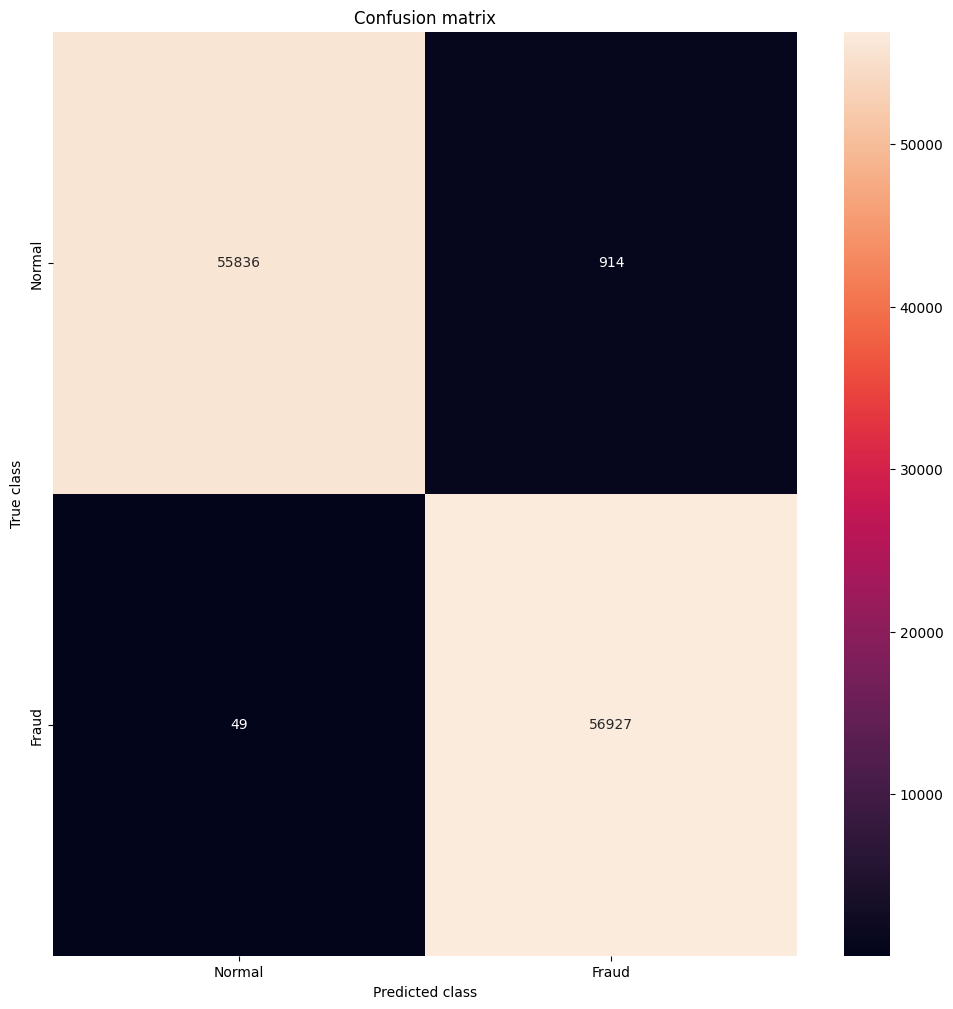

In [ ]:
# Add this line at the beginning of your code, or with your other imports
from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred_dl) # Use yPred_dl from your deep learning model or other relevant predictions
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()